In [2]:
import pandas as pd
import os
os.chdir("C:\\Users\\Zber\\Documents\\Dev_program\\OpenRadar")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [3]:
ldm_csv_path = "C:/Users/Zber/Documents/Dev_program/OpenRadar/FER/results/Supervision_heatmap_landmark_baseline_20220608-102041/metrics.csv"
ldm_df = pd.read_csv (ldm_csv_path, sep='\t')

In [4]:
test_loss =  np.asarray(ldm_df['test_loss']) *3

test_loss[18:20] = test_loss[18:20] - 2 
test_loss[15:17] = test_loss[15:17] - 1.3 

train_loss = np.asarray(ldm_df['train_loss']) *3
test_acc = np.asarray(ldm_df['precision'])
x = np.arange(1,51,1)

In [5]:
ldm_df

,Unnamed: 0,train_loss,train_cls_loss,train_kd_loss,precision,test_loss,test_kd_loss
0,0,2.557738,1.834651,0.144617,31.428571,1.843459,0.011293
1,1,1.614348,1.569625,0.008945,30.000000,1.969156,0.011235
2,2,1.461552,1.418934,0.008524,43.333333,1.379870,0.015406
3,3,1.291786,1.250743,0.008209,34.761905,1.736749,0.008534
4,4,1.165234,1.125760,0.007895,53.809524,1.210304,0.008233
5,5,1.011802,0.974785,0.007403,48.571429,1.553950,0.008866
6,6,0.905993,0.869640,0.007271,44.285714,1.841272,0.008276
7,7,0.855984,0.817687,0.007659,51.904762,1.428181,0.008755
8,8,0.811601,0.773762,0.007568,48.571429,1.499543,0.010096
9,9,0.636788,0.601134,0.007131,52.857143,1.647562,0.007841


In [6]:
test_acc[-1]

62.38095238095238

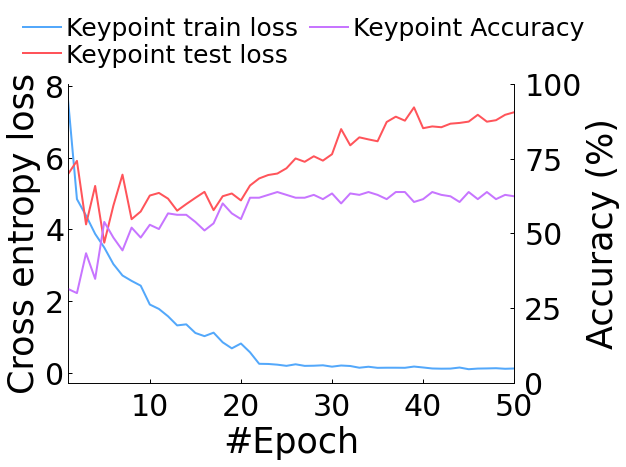

In [23]:
import matplotlib.ticker as ticker
# ax.fill_between(x, y-error, y+error, alpha=0.2, edgecolor=color, facecolor=color)
# landmark + label overfitting
colors = ['#53a8fb', '#a97ddd', '#64c44b', '#68dcf2', "#F4820B", "#FF545A", "#C775FF"]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5.5))
ax2 = ax.twinx()
ax.set_facecolor("none")
ax2.set_facecolor("none")
name2 = "Keypoint"

lw = 2

ax.plot(x, train_loss, color=colors[0], linestyle='solid',
        fillstyle='none', label='{} train loss'.format(name2), linewidth=lw)


ax.plot(x, test_loss, color=colors[5], linestyle='solid',
        fillstyle='none', label='{} test loss'.format(name2), linewidth=lw)


ax2.plot(x, test_acc, color=colors[6],  linestyle='solid',
         label='{} Accuracy'.format(name2), linewidth=lw)



ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# ax2.axhline(y = y, color=colors[2], linewidth=lw)


ax.set_ylabel("Cross entropy loss", fontsize=35)
ax.set_xlabel("#Epoch", fontsize=35)
ax2.set_ylabel("Accuracy (%)", fontsize=35)

ax.set_xlim(1, 50)
ax2.set_xlim(1, 50)
handles, labels = ax.get_legend_handles_labels()
new_handles, new_labels = ax2.get_legend_handles_labels()
H = handles + new_handles
L = labels + new_labels

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
# L, H = zip(*sorted(zip(L, H), key=lambda t: t[0]))

# L = np.asarray(L)
# H = np.asarray(H)
# temp = L[-1]
# L[-1] = L[0]
# L[0] = temp

# temp = H[-1]
# H[-1] = H[0]
# H[0] = temp

ax.yaxis.set_tick_params(labelsize=30, length=4, direction='in', width=1)
ax2.yaxis.set_tick_params(labelsize=30, length=4, direction='in', width=1, pad=10)
ax.xaxis.set_tick_params(labelsize=30, length=4, direction='in', width=1, pad=10)
ax2.xaxis.set_tick_params(labelsize=30, length=4, direction='in', width=1)
ax2.set_ylim(0, 100)

ax.legend(H, L, loc="upper left", prop={'size': 25, }, ncol=2, bbox_to_anchor=(-0.15, 1.3), fancybox=True,
               framealpha=0.0, labelspacing=0.1, handletextpad=0.2, columnspacing=0.5, handlelength=1.5)

# fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/0.Method/m2_3.pdf',format='pdf', bbox_inches="tight")
fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/0.Method/m2_3.svg',format='svg', bbox_inches="tight")
